# Ex1
Write a class modelling a real work object. Write a subclass of it. Create instances of your class and subclass and access variables /call methods associated with your instances/classes. 

I choose to write 2 classes: Money and Account to representing a bank account and its transactions.

The class Money has only one attribute which is the amount (value) of money

The class Account has 5 attributes which are:
- first name of account holder
- last name of account holder
- account number
- transaction_allowed
- account value
- acoount transactions log

In the class Account there are some methods (represent the transaction actions) like:
- deposit Money
- withdraw Money


In [13]:
import math
class Money:
    ''' Class for Money.

    Attributes
    ==========
    n: float or integer
        initial value of money

    Methods
    =======
    is_zero: float or integer
        returns True if the initial value of money = 0
    is_positive: float or integer number
        returns True if the initial value of money > 0
    is_negative: float or integer
        returns True if the initial value of money < 0
    add: float or integer
        returns a Money which has value equals the sum of two Money
    sub: float or integer
        returns a Money which has value equals the substraction of two Money
    '''
    def __init__(self, n = 0):
        self.n = n

    # methods to check if the Money is zero, more than 0 or less than 0
    def is_zero(self):
        return self.n == 0
    
    def is_positive(self):
        return self.n > 0

    def is_negative(self):
        return not (self.is_zero() or self.is_positive())

    # method to add/substract to the amount = other
    def add(self, other):
        assert type(other) is Money # if the condition type(other) is Money then nothing happen, 
                                    # and the program continue run to the next line
                                    # otherwise AssertionError will appear
        new_amount = Money(0)
        new_amount.n = self.n + other.n
        return new_amount
    
    def sub(self, other):
        assert type(other) is Money
        new_amount = Money(0)
        new_amount.n = self.n - other.n
        return new_amount

    def __repr__(self):
        return f'Money({self.n:.2f})' # I want to present the amount of money with 2 decimal points
    


**Note:** If I saved all the class in HW_10_class.py file then I need the following command to call the module:

**from HW_10_class import ***

In [14]:
amount1 = Money(100.1325)
amount2 = Money(0)
amount3 = Money(-50)
print('the amount1 is', repr(amount1))
print('Check if the amount1 is zero:', amount1.is_zero())
print('Check if the amount1 is positive number:', amount1.is_positive())
print('Check if the amount1 is negative number:', amount1.is_negative())


the amount1 is Money(100.13)
Check if the amount1 is zero: False
Check if the amount1 is positive number: True
Check if the amount1 is negative number: False


In [15]:
amount1 + amount2

TypeError: unsupported operand type(s) for +: 'Money' and 'Money'

In [16]:
print('Total amount of amount1 and amount3 is', amount3.add(amount1))
print('amount1 substracts amount3 is', amount1.sub(amount3))
amount4 =  amount1.add(amount3)
print('amount1 is:', amount1)
print('amount3 is:', amount3)
print('total amount 1 and 3 is amount4 = ', amount4)


Total amount of amount1 and amount3 is Money(50.13)
amount1 substracts amount3 is Money(150.13)
amount1 is: Money(100.13)
amount3 is: Money(-50.00)
total amount 1 and 3 is amount4 =  Money(50.13)


In [17]:
class Account:
    ''' Class Account.

    Attributes
    ==========
    first_name: str
        first name of account holder
    last_name: str
        last name of account holder
    account_number: integer
        account number
    transction_allowed: str
        'Yes' if the account is allowed to make transaction.
        'No' is the account is not allowed to make transaction.
    amount: Money
        the amount in account (defaul is 0, when create new account)
    transactions: list
        store transaction deatail: ('type_transaction', transaction_amount, amount_of_account_after_transaction)
    
    Methods
    =======
    deposit: 
         execute the depositing money action if the transaction amount is > 0
    withdraw:
         execute the withdraw money action if the transaction amount is < 0
  
    '''
    #constructor, initializer
    def __init__(self, first_name, last_name, account_number, transction_allowed = 'Yes'):
        self.first_name = first_name
        self.last_name = last_name
        self.account_number = account_number
        self.transction_allowed = transction_allowed
        
        self.amount = Money(0)
        self.transactions = []

    # instance methods /regular methods
    def printName(self):
        print(self.first_name +' '+  self.last_name)

    def deposit(self, transaction):        
        assert isinstance(transaction, Money)
        if transaction.is_positive():
            self.amount = self.amount.add(transaction)
            # add transaction to history
            self.transactions.append(('deposit', transaction, self.amount))

        elif transaction_amount.is_zero():
            raise ValueError('A zero deposit is not a transaction.')
        else:
            raise ValueError('A negative deposit should be a withdrawal.')

    def withdraw(self, transaction):
        assert isinstance(transaction, Money)
        
        if transaction.is_positive():
            if self.transction_allowed == 'No':
                self.transactions.append(('false', transaction, self.amount))
                raise ValueError('The withdraw amount is greater than the current account value')
            elif self.transction_allowed == 'Yes':
                new_amount = self.amount.sub(transaction)
                if not new_amount.is_negative():
                    self.amount = new_amount
                    self.transactions.append(('withdraw', transaction, self.amount))
                else:
                    self.transactions.append(('false', transaction, self.amount))
                    raise ValueError('The withdraw amount is greater than the current account value')

        elif transaction.is_zero():
            raise ValueError('A zero withdrawal is not a transaction.')
        else:
            raise ValueError('A negative withdrawal should be a deposit.')

            

**Example:** I create an account and deposit into the account SEK2000, then withdraw SEK100.

In [18]:
if __name__ == '__main__':
    # Create an account
    my_account = Account('Zina', 'Cap', '00001', transction_allowed = 'Yes') 
    print('my account', my_account)
    
    # Deposit 2000kr to my account
    my_account.deposit(Money(2000))
    # Withdraw 100kr from my account
    my_account.withdraw(Money(100))

    print(my_account.amount)

my account <__main__.Account object at 0x10d4e07f0>
Money(1900.00)


**Assume that each day My mom will give me randomly 10kr or 200kr each days. Let see how much money I can get after 10 days**

For simplicity, I just do 1 predict tranjaction in this exercise.

In [6]:
if __name__ == '__main__':
    # Create my mom account and deposit to her account 5000kr
    mom_account = Account('Tina','Nguyen', '00007', transction_allowed = 'Yes')
    mom_account.deposit(Money(5000))
    
    import random
    # Change the seed to get different random behavior
    random.seed(500)
    # If the random number less than 0.5 then my mom give me 10kr, otherwise she will give my 200kr
    for i in range(10):
        if random.random() < 0.5:
            transaction_amount = Money(10)
            my_account.deposit(transaction_amount)
            mom_account.withdraw(transaction_amount)
        else:
            transaction_amount = Money(200)
            my_account.deposit(transaction_amount)
            mom_account.withdraw(transaction_amount)
            
    print('My Account transaction history', my_account.transactions)
    print('\n')
    
    print('My Mom Account transaction history',mom_account.transactions)

My Account transaction history [('deposit', Money(2000.00), Money(2000.00)), ('withdraw', Money(100.00), Money(1900.00)), ('deposit', Money(200.00), Money(2100.00)), ('deposit', Money(200.00), Money(2300.00)), ('deposit', Money(200.00), Money(2500.00)), ('deposit', Money(10.00), Money(2510.00)), ('deposit', Money(200.00), Money(2710.00)), ('deposit', Money(10.00), Money(2720.00)), ('deposit', Money(200.00), Money(2920.00)), ('deposit', Money(10.00), Money(2930.00)), ('deposit', Money(200.00), Money(3130.00)), ('deposit', Money(200.00), Money(3330.00))]


My Mom Account transaction history [('deposit', Money(5000.00), Money(5000.00)), ('withdraw', Money(200.00), Money(4800.00)), ('withdraw', Money(200.00), Money(4600.00)), ('withdraw', Money(200.00), Money(4400.00)), ('withdraw', Money(10.00), Money(4390.00)), ('withdraw', Money(200.00), Money(4190.00)), ('withdraw', Money(10.00), Money(4180.00)), ('withdraw', Money(200.00), Money(3980.00)), ('withdraw', Money(10.00), Money(3970.00)), (

In [7]:
print("my account value after 10 days is ", my_account.amount)
print("my mom account value after 10 days is", mom_account.amount)

my account value after 10 days is  Money(3330.00)
my mom account value after 10 days is Money(3570.00)


# Ex2
Read Appendix B of textbook 1 Hilpisch(2018). 
    - Make some modifications on class **bsm_call_option** in  **bsm_option_class.py**; for example you may include the case of put option by adding an attribute on option style and modify the **value()** method accordingly.
    - Do some implementations using this class following the examples in Appendix B. 

You may download the module **bsm_option_class.py** in Quant Platform: https://py4fi.pqp.io/nb/portal/login or directly in Canvas. 

In [20]:
#
# Valuation of European call options in Black-Scholes-Merton Model
# incl. Vega function and implied volatility estimation
# -- class-based implementation
#
# Python for Finance, 2nd ed.
# (c) Dr. Yves J. Hilpisch
#
from math import log, sqrt, exp
from scipy import stats


class bsm_option(object):
    ''' Class for European options in BSM model.

    Attributes
    ==========
    S0: float
        initial stock/index level
    K: float
        strike price
    T: float
        maturity (in year fractions)
    r: float
        constant risk-free short rate
    sigma: float
        volatility factor in diffusion term
    type_opt: str
        'Call' or 'Put'

    Methods
    =======
    value: float
        returns the present value of option
    vega: float
        returns the Vega of option
    imp_vol: float
        returns the implied volatility given option quote
    '''

    def __init__(self, S0, K, T, r, sigma, type_opt = 'Call'):
        self.S0 = float(S0)
        self.K = K
        self.T = T
        self.r = r
        self.sigma = sigma
        self.type_opt = type_opt

    def value(self):
        ''' Returns option value.
        '''
        d1 = ((log(self.S0 / self.K) +
               (self.r + 0.5 * self.sigma ** 2) * self.T) /
              (self.sigma * sqrt(self.T)))
        d2 = ((log(self.S0 / self.K) +
               (self.r - 0.5 * self.sigma ** 2) * self.T) /
              (self.sigma * sqrt(self.T)))
        if self.type_opt == 'Call':
            value = (self.S0 * stats.norm.cdf(d1, 0.0, 1.0) -
                     self.K * exp(-self.r * self.T) * stats.norm.cdf(d2, 0.0, 1.0))
        elif self.type_opt == 'Put':
            value =  (self.K * exp(-self.r * self.T) * stats.norm.cdf(- d2, 0.0, 1.0)-
                      self.S0 * stats.norm.cdf(-d1, 0.0, 1.0))
        else:
            print('type of option should be either Call or Put, str type')
                      
        return value

    def vega(self):
        ''' Returns Vega of option.
        '''
        d1 = ((log(self.S0 / self.K) +
               (self.r + 0.5 * self.sigma ** 2) * self.T) /
              (self.sigma * sqrt(self.T)))
        vega = self.S0 * stats.norm.pdf(d1, 0.0, 1.0) * sqrt(self.T)
        return vega

    def imp_vol(self, C0, sigma_est=0.2, it=100):
        ''' Returns implied volatility given option price.
        '''
        option = bsm_option(self.S0, self.K, self.T, self.r, sigma_est, self.type_opt)
        for i in range(it):
            option.sigma -= (option.value() - C0) / option.vega()
        return option.sigma


In [21]:
my_opt = bsm_option(100, 80, 1.2, 0.04, 0.3, type_opt = 'Put')

opt_value = my_opt.value()
print('my option value calculated under BS model is: ', opt_value)

opt_vega = my_opt.vega()
print('my option vaga calculated under BS model is: ', opt_vega)

C0 = 2.88
opt_impiled_sigma = my_opt.imp_vol(C0, sigma_est=0.2, it=100)

print(f'With the market opt price is {C0}, my implied volatility: {opt_impiled_sigma}')

my option value calculated under BS model is:  3.273359842071951
my option vaga calculated under BS model is:  26.78804545870703
With the market opt price is 2.88, my implied volatility: 0.2850622449180865


In [22]:
import numpy as np
from pylab import cm, mpl, plt
from mpl_toolkits.mplot3d import Axes3D
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

# Make input:
maturities = np.linspace(0.05,2.0,20)
strikes = np.linspace(80,120,20)
T, K = np.meshgrid(strikes, maturities)
Value = np.zeros_like(K)
Vega = np.zeros_like(Value)

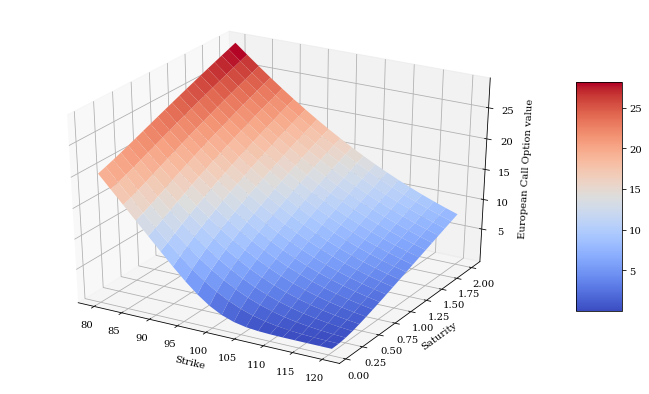

In [11]:
ex2_opt = bsm_option(100, 105, 1.0, 0.05, 0.2, type_opt = 'Call')
for t in enumerate(maturities):
    for k in enumerate(strikes):
        ex2_opt.T = t[1]
        ex2_opt.K = k[1]        
        Value[t[0], k[0]] = ex2_opt.value()
        Vega[t[0], k[0]] = ex2_opt.vega()   

fig = plt.figure(figsize = (12,7))
ax = fig.gca(projection = '3d')
surf = ax.plot_surface(T, K, Value, rstride = 1, cstride = 1,
                       cmap = cm.coolwarm, linewidth = 0.5, antialiased = True)
ax.set_xlabel('Strike')
ax.set_ylabel('Saturity')
ax.set_zlabel(f'European Call Option value')
fig.colorbar(surf, shrink = 0.6, aspect = 5)

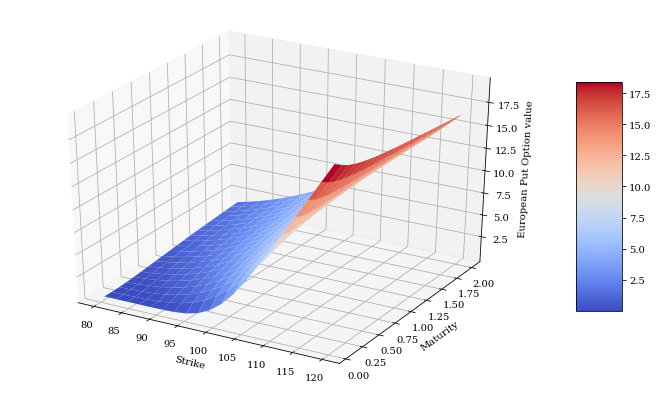

In [23]:
ex3_opt = bsm_option(100, 85, 1.0, 0.05, 0.2, type_opt = 'Put')
# Make input:
maturities = np.linspace(0.05,2.0,20)
strikes = np.linspace(80,120,20)
T, K = np.meshgrid(strikes, maturities)
Value_put = np.zeros_like(K)
Vega = np.zeros_like(Value)
for t in enumerate(maturities):
    for k in enumerate(strikes):
        ex3_opt.T = t[1]
        ex3_opt.K = k[1]        
        Value_put[t[0], k[0]] = ex3_opt.value()
        Vega[t[0], k[0]] = ex3_opt.vega()   

fig = plt.figure(figsize = (12,7))
ax = fig.gca(projection = '3d')
surf = ax.plot_surface(T, K, Value_put, rstride = 1, cstride = 1,
                       cmap = cm.coolwarm, linewidth = 0.5, antialiased = True)
ax.set_xlabel('Strike')
ax.set_ylabel('Maturity')
ax.set_zlabel(f'European Put Option value')
fig.colorbar(surf, shrink = 0.6, aspect = 5)
